### Packages

In [1]:
import importlib, import_ipynb
import data_clean_order_combined as data

# Data processing
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras import preprocessing as kprocessing
from tensorflow.keras import models, layers, optimizers

import transformers

# Visualization
import matplotlib.pyplot as plt

# Text processing
import re
import nltk
import gensim.downloader as api

# Various
from datetime import datetime



%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

importing Jupyter notebook from data_clean_order_combined.ipynb
Length of original data set 209527
Number of examples with no short description:  19712
Number of examples with no headline:  6


c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anacond

Stored 'test_df' (DataFrame)
Size of training data for combined:  167616
Size of testing data for combined:  41905
Stored 'rand_shuffled_text' (DataFrame)
Stored 'ordered_super_alpha_text' (DataFrame)
Stored 'ordered_class_alpha_text' (DataFrame)
Stored 'ordered_sem_clusters_desc_text' (DataFrame)
Stored 'ordered_sem_clusters_asc_text' (DataFrame)
Stored 'ordered_sem_clusters_shuffled_per_superclass_text' (DataFrame)


### Loading ordered data from data_clean_order_text.ipynb

In [2]:
%store -r rand_shuffled_text
%store -r ordered_super_alpha_text
%store -r ordered_class_alpha_text
%store -r ordered_sem_clusters_desc_text
%store -r ordered_sem_clusters_asc_text
%store -r ordered_sem_clusters_shuffled_per_superclass_text
%store -r test_df

In [3]:
ordered_sem_clusters_shuffled_per_superclass_text.head(5)

headline  \
76371   Prince Harry Helps Woman In Wheelchair Who Fell, Proves Again He's Pretty Darn Perfect   
57754                        This Nonprofit's Shelter Pup Sleepovers Aim To Help Spur Adoption   
101093   For Past 3 Years, Teen Has Carried Fellow Student Who Has Muscular Dystrophy To Class   
43345                                                 Bridging The Divide At The Checkout Line   
67186                            Dog Who Was Born In A Shelter Can't Stop Kissing His New Baby   

            class superclass  \
76371   GOOD NEWS   POLITICS   
57754   GOOD NEWS   POLITICS   
101093  GOOD NEWS   POLITICS   
43345   GOOD NEWS   POLITICS   
67186   GOOD NEWS   POLITICS   

                                                                                                                   short_description  \
76371                                                       So we're proposing that Prince Harry change his name to Prince Charming.   
57754                                                                                      This is really upping the sleepover game.   
101093                                                                                                                                 
43345   I have a confession: I absolutely LOVE grocery shopping. I don’t know what it is about it – the predictability of the aisles   
67186       When a family in Iowa welcomed a baby girl into their home recently, a dog named Blake was among the first to greet her.   

                                                         cleaned_headline  \
76371   prince harry help woman wheelchair fell prove pretty darn perfect   
57754            nonprofits shelter pup sleepovers aim help spur adoption   
101093      past years teen carry fellow student muscular dystrophy class   
43345                                         bridge divide checkout line   
67186                          dog bear shelter cannot stop kiss new baby   

                                                           cleaned_short_description  \
76371                                  propose prince harry change name prince charm   
57754                                                       really up sleepover game   
101093                                                                                 
43345             confession absolutely love grocery shop know predictability aisles   
67186   family iowa welcome baby girl home recently dog name blake among first greet   

                                                                                                                       combined  
76371           prince harry help woman wheelchair fell prove pretty darn perfect propose prince harry change name prince charm  
57754                                         nonprofits shelter pup sleepovers aim help spur adoption really up sleepover game  
101093                                                           past years teen carry fellow student muscular dystrophy class   
43345                            bridge divide checkout line confession absolutely love grocery shop know predictability aisles  
67186   dog bear shelter cannot stop kiss new baby family iowa welcome baby girl home recently dog name blake among first greet

In [4]:
# TRAIN EXAMPLES
XB_train = rand_shuffled_text['combined'].to_frame()
X1_train = ordered_super_alpha_text['combined'].to_frame()
X2_train = ordered_class_alpha_text['combined'].to_frame()
X3_train = ordered_sem_clusters_desc_text['combined'].to_frame()
X4_train = ordered_sem_clusters_asc_text['combined'].to_frame()
X5_train = ordered_sem_clusters_shuffled_per_superclass_text['combined'].to_frame()

# TRAIN LABELS
YB_train = rand_shuffled_text['class']
Y1_train = ordered_super_alpha_text['class']
Y2_train = ordered_class_alpha_text['class']
Y3_train = ordered_sem_clusters_desc_text['class']
Y4_train = ordered_sem_clusters_asc_text['class']
Y5_train = ordered_sem_clusters_shuffled_per_superclass_text['class']

# TEST EXAMPLES
X_test = test_df['combined']
Y_test = test_df['class']

In [5]:
YB_train[:100]

8452          QUEER VOICES
42174     GENERAL POLITICS
90062       HEALTHY LIVING
119426            RELIGION
127707            BUSINESS
                ...       
50933              LEISURE
16344     GENERAL POLITICS
188010            WELLNESS
51872     GENERAL POLITICS
164258           PARENTING
Name: class, Length: 100, dtype: object

In [6]:
Y1_train[:100]

0             WOMEN
1     LATINO VOICES
2      QUEER VOICES
3      QUEER VOICES
4      QUEER VOICES
          ...      
95            WOMEN
96    LATINO VOICES
97     BLACK VOICES
98     BLACK VOICES
99     BLACK VOICES
Name: class, Length: 100, dtype: object

In [7]:
Y2_train[:100]

0     ARTS
1     ARTS
2     ARTS
3     ARTS
4     ARTS
      ... 
95    ARTS
96    ARTS
97    ARTS
98    ARTS
99    ARTS
Name: class, Length: 100, dtype: object

In [8]:
Y3_train[:100]

124413    GENERAL POLITICS
30957     GENERAL POLITICS
24312     GENERAL POLITICS
7288      GENERAL POLITICS
27077     GENERAL POLITICS
                ...       
19524     GENERAL POLITICS
36084     GENERAL POLITICS
122753    GENERAL POLITICS
69285     GENERAL POLITICS
25933     GENERAL POLITICS
Name: class, Length: 100, dtype: object

In [9]:
Y4_train[:100]

172426    CULTURE & ARTS
176361    CULTURE & ARTS
151252    CULTURE & ARTS
141925    CULTURE & ARTS
198486    CULTURE & ARTS
               ...      
143854    CULTURE & ARTS
648       CULTURE & ARTS
167684    CULTURE & ARTS
169692    CULTURE & ARTS
164990    CULTURE & ARTS
Name: class, Length: 100, dtype: object

In [10]:
Y5_train[:100]

76371     GOOD NEWS
57754     GOOD NEWS
101093    GOOD NEWS
43345     GOOD NEWS
67186     GOOD NEWS
            ...    
113389    GOOD NEWS
68705     GOOD NEWS
89854     GOOD NEWS
129676    GOOD NEWS
61466     GOOD NEWS
Name: class, Length: 100, dtype: object

In [11]:
Y_test[:100]

54871     GENERAL POLITICS
25625     GENERAL POLITICS
48772         QUEER VOICES
114382               STYLE
75653     GENERAL POLITICS
                ...       
6049      GENERAL POLITICS
23369                TASTE
29132     GENERAL POLITICS
137626            WELLNESS
90732     GENERAL POLITICS
Name: class, Length: 100, dtype: object

## Tokenization and Vectorization

### Cleaning X sets

In [12]:
# Reference: Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT from Medium

# Use stopwords list from nltk
lst_stopwords = nltk.corpus.stopwords.words("english")

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # Clean (convert to lowercase and remove punctuations and characters and then strip)
    # The function is not optimized for speed but split into various steps for pedagogical purpose
    text = str(text).lower()
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize (convert from string to list)
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    # Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    # back to string from list
    text = " ".join(lst_text)
    return text

In [13]:
def process_X(df):

    # Let's apply this function to the whole corpus
    df["text_clean"] = df["combined"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

    # Let's look at the output
    #display(f.head())

    return df

In [14]:
XB_train = process_X(XB_train)
X1_train = process_X(X1_train)
X2_train = process_X(X2_train)
X3_train = process_X(X3_train)
X4_train = process_X(X4_train)
X5_train = process_X(X5_train)

In [15]:
print(YB_train.value_counts())
print(Y4_train.value_counts())

GENERAL POLITICS    28485
WELLNESS            14261
LEISURE             13898
TRAVEL               7890
STYLE & BEAUTY       7884
PARENTING            7015
HEALTHY LIVING       5362
FOOD & DRINK         5083
QUEER VOICES         5057
BUSINESS             4857
COMEDY               4393
SPORTS               4060
BLACK VOICES         3683
HOME & LIVING        3413
PARENTS              3167
THE WORLDPOST        2931
WEDDINGS             2904
WOMEN                2837
CRIME                2830
IMPACT               2787
DIVORCE              2736
WORLD NEWS           2634
MEDIA                2363
WEIRD NEWS           2223
GREEN                2117
WORLDPOST            2073
RELIGION             2039
STYLE                1795
SCIENCE              1756
TASTE                1704
TECH                 1700
MONEY                1428
ARTS                 1192
ENVIRONMENT          1148
FIFTY                1125
GOOD NEWS            1116
U.S. NEWS            1108
ARTS & CULTURE       1077
COLLEGE     

## Vectorizing

In [16]:
corpus = XB_train
# Initizalize the vectorizer with max nr words and ngrams (1: single words, 2: two words in a row)
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2))
# Fit the vectorizer to the training data
vectorizer_tfidf.fit(corpus)
TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

# BASELINE ORDER - RAND SHUFFLED

In [17]:
X_train = XB_train['text_clean']
y_train = YB_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.8%
Accuracy Test data: 57.8%
Training time: 127.6s
                  precision    recall  f1-score   support

            ARTS       0.33      0.17      0.23       317
  ARTS & CULTURE       0.28      0.10      0.14       262
    BLACK VOICES       0.51      0.37      0.43       900
        BUSINESS       0.47      0.42      0.44      1134
         COLLEGE       0.44      0.28      0.34       218
          COMEDY       0.52      0.42      0.46      1007
           CRIME       0.54      0.52      0.53       732
  CULTURE & ARTS       0.68      0.15      0.24       220
         DIVORCE       0.79      0.70      0.74       690
       EDUCATION       0.40      0.25      0.31       198
     ENVIRONMENT       0.65      0.17      0.27       296
           FIFTY       0.35      0.07      0.12       276
    FOOD & DRINK       0.61      0.70      0.65      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.47      0.16      0.24    

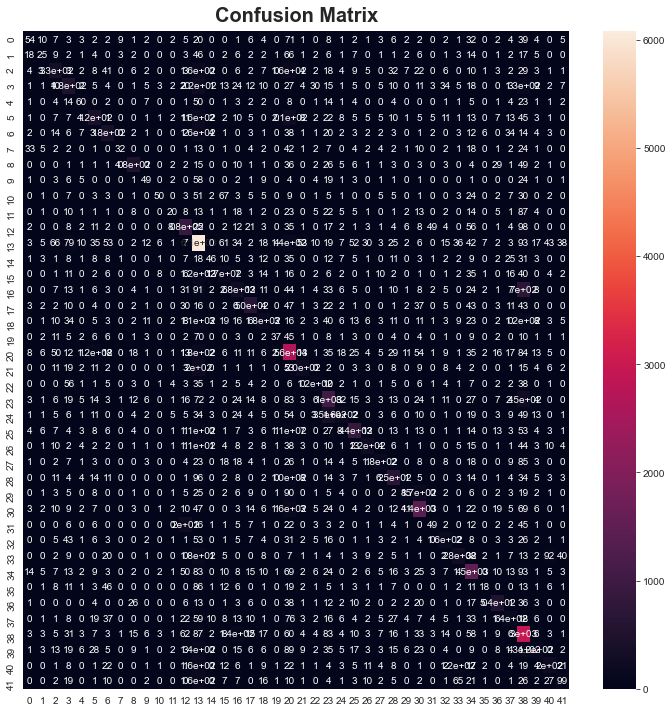

In [18]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);

# EXPERIMENT ORDER 1

In [19]:
X_train = X1_train['text_clean']
y_train = Y1_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.8%
Accuracy Test data: 57.7%
Training time: 118.4s
                  precision    recall  f1-score   support

            ARTS       0.32      0.15      0.21       317
  ARTS & CULTURE       0.30      0.11      0.17       262
    BLACK VOICES       0.51      0.37      0.43       900
        BUSINESS       0.47      0.42      0.44      1134
         COLLEGE       0.44      0.28      0.34       218
          COMEDY       0.51      0.42      0.46      1007
           CRIME       0.54      0.53      0.53       732
  CULTURE & ARTS       0.67      0.18      0.29       220
         DIVORCE       0.79      0.70      0.74       690
       EDUCATION       0.39      0.19      0.26       198
     ENVIRONMENT       0.65      0.17      0.27       296
           FIFTY       0.31      0.07      0.12       276
    FOOD & DRINK       0.61      0.70      0.66      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.46      0.16      0.24    

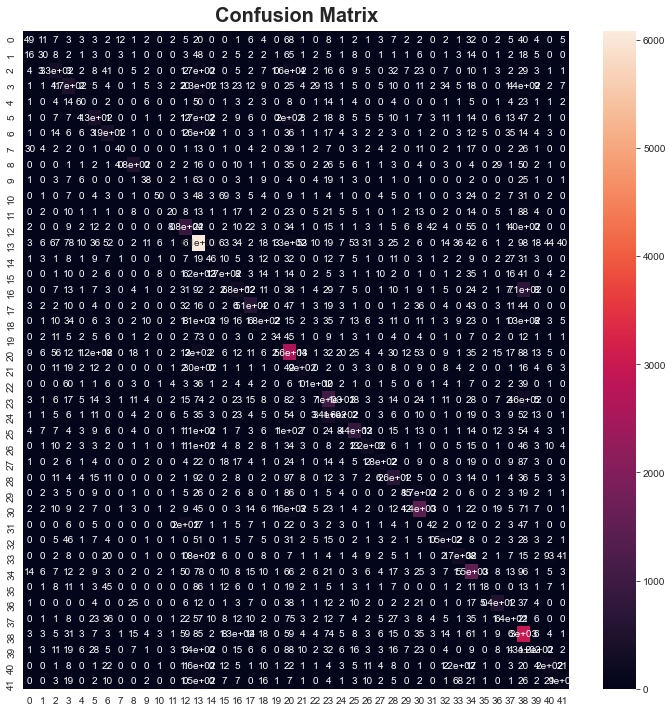

In [20]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);

# EXPERIMENT ORDER 2

In [21]:
X_train = X2_train['text_clean']
y_train = Y2_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.7%
Accuracy Test data: 57.7%
Training time: 113.2s
                  precision    recall  f1-score   support

            ARTS       0.34      0.16      0.22       317
  ARTS & CULTURE       0.29      0.11      0.16       262
    BLACK VOICES       0.51      0.37      0.43       900
        BUSINESS       0.46      0.42      0.44      1134
         COLLEGE       0.44      0.27      0.33       218
          COMEDY       0.51      0.43      0.47      1007
           CRIME       0.54      0.53      0.53       732
  CULTURE & ARTS       0.69      0.16      0.26       220
         DIVORCE       0.79      0.70      0.74       690
       EDUCATION       0.38      0.21      0.27       198
     ENVIRONMENT       0.64      0.17      0.27       296
           FIFTY       0.32      0.07      0.12       276
    FOOD & DRINK       0.61      0.70      0.65      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.46      0.16      0.24    

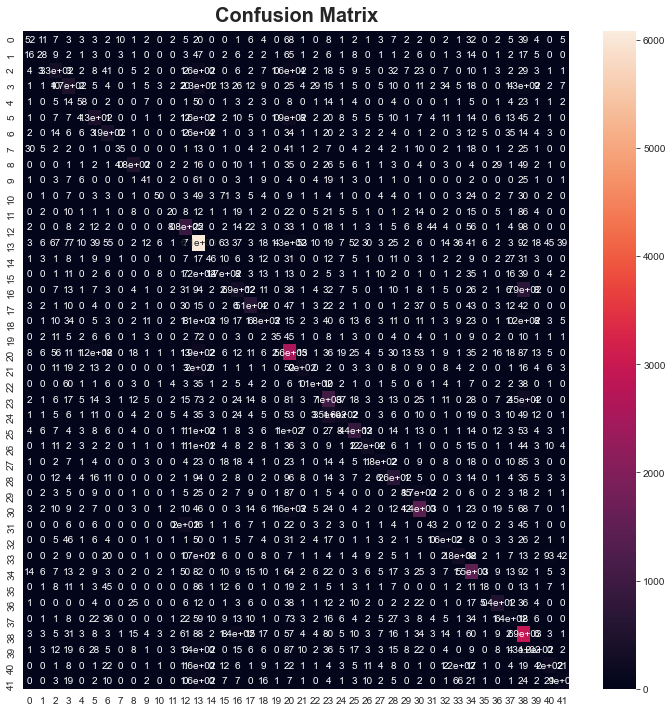

In [22]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);

# EXPERIMENT ORDER 3

In [23]:
X_train = X3_train['text_clean']
y_train = Y3_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.8%
Accuracy Test data: 57.7%
Training time: 116.9s
                  precision    recall  f1-score   support

            ARTS       0.33      0.15      0.21       317
  ARTS & CULTURE       0.31      0.12      0.18       262
    BLACK VOICES       0.51      0.37      0.43       900
        BUSINESS       0.47      0.42      0.44      1134
         COLLEGE       0.44      0.27      0.33       218
          COMEDY       0.51      0.43      0.47      1007
           CRIME       0.54      0.53      0.54       732
  CULTURE & ARTS       0.65      0.19      0.29       220
         DIVORCE       0.80      0.69      0.74       690
       EDUCATION       0.39      0.20      0.26       198
     ENVIRONMENT       0.64      0.17      0.27       296
           FIFTY       0.31      0.07      0.12       276
    FOOD & DRINK       0.61      0.70      0.65      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.45      0.16      0.24    

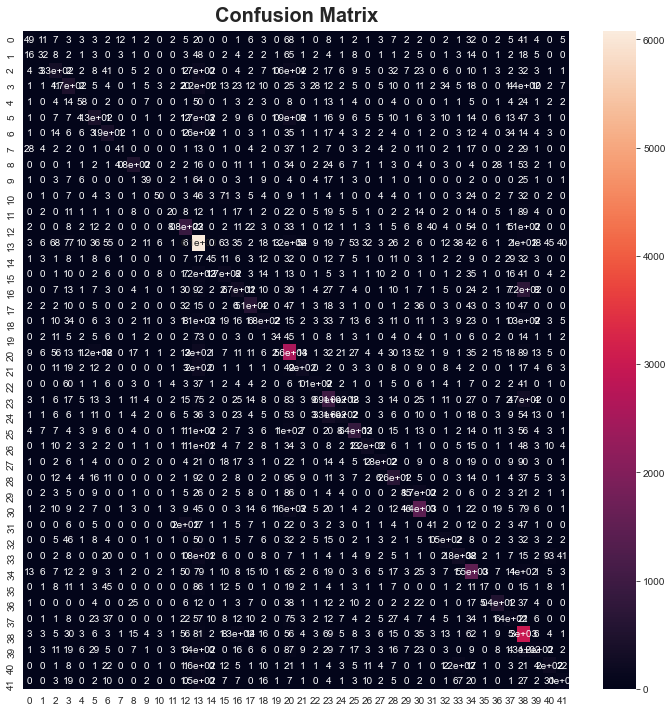

In [24]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);

# EXPERIMENT ORDER 4

In [25]:
X_train = X4_train['text_clean']
y_train = Y4_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.7%
Accuracy Test data: 57.7%
Training time: 107.7s
                  precision    recall  f1-score   support

            ARTS       0.33      0.16      0.22       317
  ARTS & CULTURE       0.30      0.11      0.17       262
    BLACK VOICES       0.52      0.37      0.43       900
        BUSINESS       0.47      0.42      0.44      1134
         COLLEGE       0.44      0.26      0.32       218
          COMEDY       0.52      0.41      0.46      1007
           CRIME       0.54      0.53      0.53       732
  CULTURE & ARTS       0.68      0.15      0.24       220
         DIVORCE       0.80      0.69      0.74       690
       EDUCATION       0.40      0.23      0.29       198
     ENVIRONMENT       0.64      0.17      0.27       296
           FIFTY       0.31      0.07      0.12       276
    FOOD & DRINK       0.61      0.70      0.65      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.46      0.17      0.24    

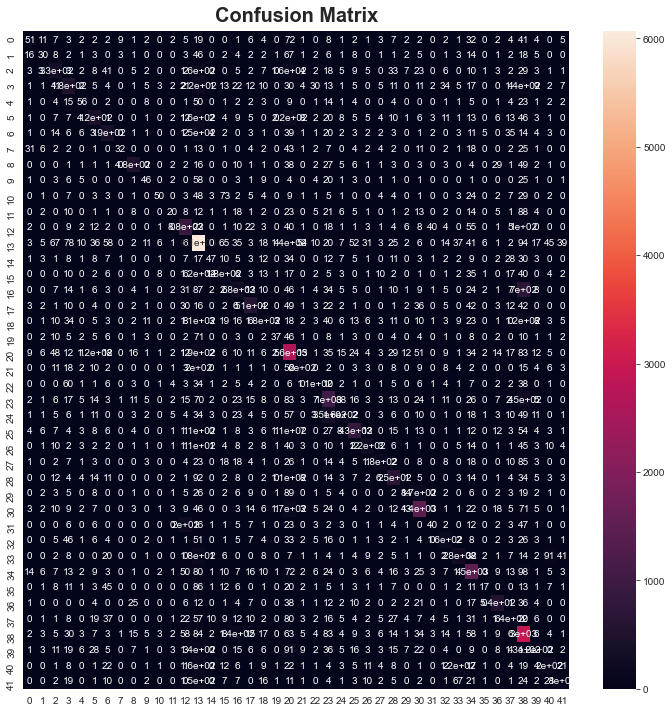

In [26]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);

# EXPERIMENT ORDER 5

In [27]:
X_train = X5_train['text_clean']
y_train = Y5_train

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

Accuracy Training data: 66.8%
Accuracy Test data: 57.7%
Training time: 120.8s
                  precision    recall  f1-score   support

            ARTS       0.32      0.15      0.21       317
  ARTS & CULTURE       0.30      0.12      0.17       262
    BLACK VOICES       0.51      0.37      0.42       900
        BUSINESS       0.47      0.42      0.44      1134
         COLLEGE       0.44      0.27      0.33       218
          COMEDY       0.51      0.43      0.47      1007
           CRIME       0.54      0.53      0.54       732
  CULTURE & ARTS       0.66      0.17      0.27       220
         DIVORCE       0.80      0.69      0.74       690
       EDUCATION       0.39      0.20      0.27       198
     ENVIRONMENT       0.64      0.17      0.27       296
           FIFTY       0.31      0.07      0.12       276
    FOOD & DRINK       0.62      0.70      0.66      1257
GENERAL POLITICS       0.64      0.85      0.73      7116
       GOOD NEWS       0.46      0.16      0.24    

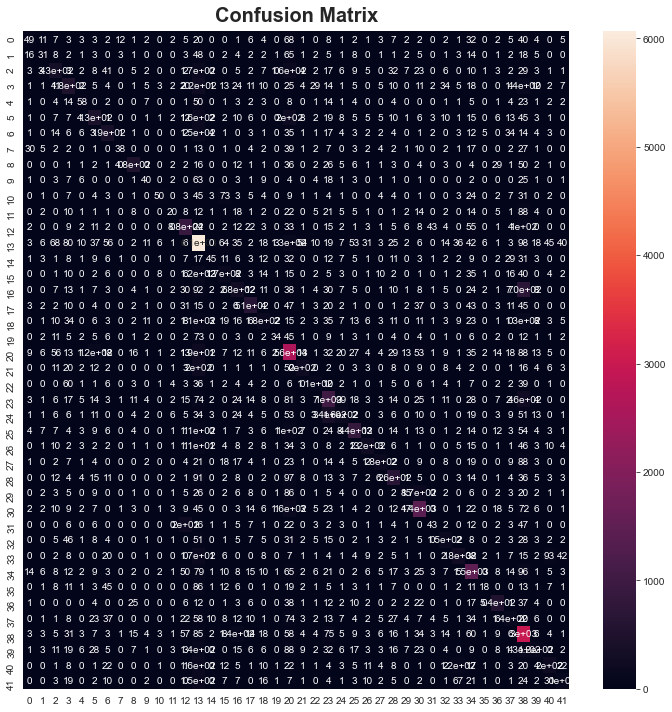

In [28]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(Y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

print(classification_report(Y_test, predicted_test_tfidf))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predicted_test_tfidf), annot=True);
plt.title('Confusion Matrix', fontsize=20);